### Final Report
Miranda Bowser

12.10.23

Dr. Silva

Have you ever been invested in a TV show and then had your favorite character or characters unexpectedly pass away? When this occurs, you become agitated and feel the want to quit viewing the show entirely. I have had countless experiences like this, particularly with "The Game of Thrones," one of my favorite television series. My question then arose as to whether I could obtain data for a statistical comparison that examines whether audience ratings are impacted by mortality rates in specific shows. 

Examining the first and last seasons of "The Game of Thrones" will be the main focus of this project. Our primary focus will be on the ratio of deaths to total viewers for these two seasons. Wikipedia provided the information relating to the number of views each season received. The information displaying the number of deaths came from the Statista website. These are two trustworthy sources that provided me with the data I required to test my theory.

In [1]:
import pandas as pd 
import base64
import json
import urllib
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
GOT = pd.read_html('https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes')
#GOT

### Game of Thrones Season 1 Data Table.
You can see that a lot of useful information about the show is shown in these first two charts. This initial chart solely pertains to season 1. This chart provides you with information on topics like the episode title, the director of that particular episode, the number of episodes in a season, and the total number of episodes in the series. The U.S. viewers (millions) column is the most crucial piece of data that we will be examining.


In [3]:
GOT[1]

,No. overall,No. in season,Title,Directed by,Written by,Original air date [20],U.S. viewers (millions)
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22[21]
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011",2.20[22]
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",2.44[23]
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011",2.45[24]
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",2.58[25]
5,6,6,"""A Golden Crown""",Daniel Minahan,Story by : David Benioff & D. B. Weiss Telepla...,"May 22, 2011",2.44[26]
6,7,7,"""You Win or You Die""",Daniel Minahan,David Benioff & D. B. Weiss,"May 29, 2011",2.40[27]
7,8,8,"""The Pointy End""",Daniel Minahan,George R. R. Martin,"June 5, 2011",2.72[28]
8,9,9,"""Baelor""",Alan Taylor,David Benioff & D. B. Weiss,"June 12, 2011",2.66[29]
9,10,10,"""Fire and Blood""",Alan Taylor,David Benioff & D. B. Weiss,"June 19, 2011",3.04[30]


### Game of Thrones Season 8  Data Table.
The exact same data is shown in the visual directly below but for season 8. This is beneficial since it enables the data to be examined independently, allowing for the drawing of more insightful conclusions.

In [4]:
GOT[8]

,No. overall,No. in season,Title,Directed by,Written by,Original air date [20],U.S. viewers (millions)
0,68,1,"""Winterfell""",David Nutter,Dave Hill,"April 14, 2019",11.76[88]
1,69,2,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,"April 21, 2019",10.29[89]
2,70,3,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019",12.02[90]
3,71,4,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,"May 5, 2019",11.80[91]
4,72,5,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,"May 12, 2019",12.48[92]
5,73,6,"""The Iron Throne""",David Benioff & D. B. Weiss,David Benioff & D. B. Weiss,"May 19, 2019",13.61[93]


### Game of Thrones Number of Death Data Table.
Another important piece of data is this chart, which shows us the number of deaths from the very first season to the very last season. This enables us to observe the shifts that have taken place throughout the course of the series or which seasons were particularly graphic. For me to be able to compare the data and make visuals, this chart is essential.

In [5]:
GOT_Deaths = pd.read_html('https://www.statista.com/statistics/420077/game-of-thrones-deadliest-seasons/')
GOT_Deaths[0]

,Characteristic,Number of deaths
0,Season 1,59
1,Season 2,130
2,Season 3,87
3,Season 4,182
4,Season 5,246
5,Season 6,540
6,Season 7,1096
7,Season 8,3523


In [6]:
for i in GOT[1:9]:
    i['U.S. viewers (millions)'] = [float(x[0:-4]) for x in i['U.S. viewers (millions)']]

### Season 1  Number of Viewer Statistic Chart.
I only included the most crucial data—the quantity of viewers in the United States, for example—in the first graphic to make it easier to comprehend. Additionally, remember that views are recording as millions. The show did reasonably well after being televised, considering these are the first season's numbers. Across the board, the viewership statistics remain consistent. The views during the season varied from 2.2 million, which was their lowest, to 3 million, which was their highest. 

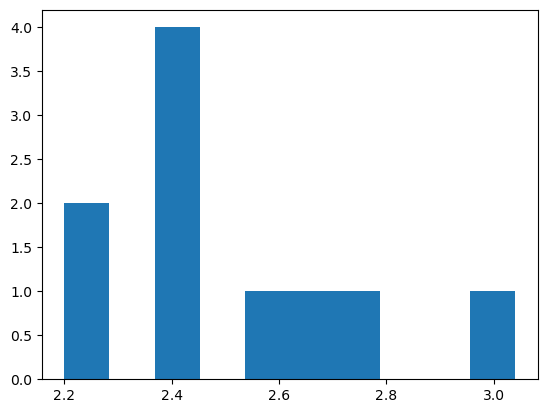

In [7]:
fig1, ax1 = plt.subplots()
ax1.hist(GOT[1]['U.S. viewers (millions)'])

plt.show()

### Season 8 Number of Viewer Statistic Chart.
The following chart displays the quantity of views each episode received throughout the season's finale. Compared to season 1, the number of viewers increased significantly in season 8. After the first season of the show was released, the ratings skyrocketed due to its increased popularity. Viewership for this season was quite constant, ranging from 12 to 12.5 million. They had about 10.5 million viewers for their least popular episode. After that, the final episode had approximately 13.5 million views, marking the highest viewing total for the entire series. 

(array([1., 0., 0., 0., 2., 1., 1., 0., 0., 1.]),
 array([10.29 , 10.622, 10.954, 11.286, 11.618, 11.95 , 12.282, 12.614,
        12.946, 13.278, 13.61 ]),
 <BarContainer object of 10 artists>)

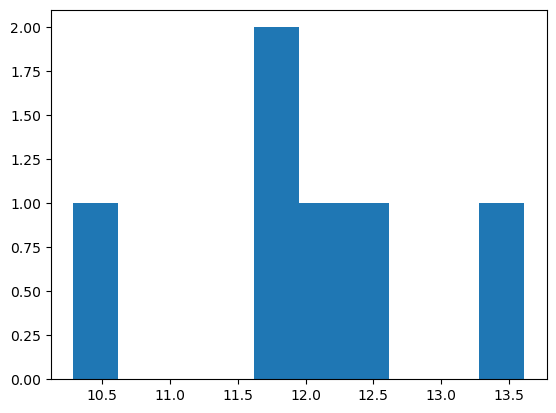

In [8]:
fig2, ax2 = plt.subplots()
ax2.hist(GOT[8]['U.S. viewers (millions)'])

### Number of Deaths Statistic Chart.
Last but not least, this figure illustrates the data regarding the total number of deaths over the course of eight seasons. Understanding the number of deaths in each season on this graphic is more challenging. I'm able to infer that there weren't many deaths over earlier seasons—between zero and four hundred. The death rates then started to rise as we moved into the middle and later seasons. A thousand or more deaths were reported in certain seasons. The final season is represented by the last column, with a total of about 3,500 deaths happened over the course of six episodes. 

(array([5., 1., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([  59. ,  405.4,  751.8, 1098.2, 1444.6, 1791. , 2137.4, 2483.8,
        2830.2, 3176.6, 3523. ]),
 <BarContainer object of 10 artists>)

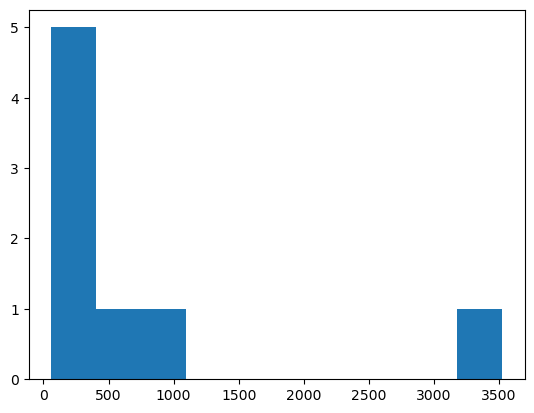

In [9]:
fig3, ax3 = plt.subplots()
ax3.hist(GOT_Deaths[0]['Number of deaths'])

In [10]:
GOT_Bar = GOT_Deaths[0].groupby('Characteristic').sum()['Number of deaths']
#GOT_Bar

In [11]:
#GOT_Bar.values

In [12]:
#GOT_Bar.index

In [13]:
#GOT_Bar.sort_values()

In [14]:
GOT_Bar1 = GOT[1].groupby('No. in season').sum()['U.S. viewers (millions)']
#GOT_Bar1

In [15]:
#GOT_Bar1.values

In [16]:
#GOT_Bar1.index

In [17]:
#GOT_Bar1.sort_values()

In [18]:
GOT_Bar2 = GOT[8].groupby('No. in season').sum()['U.S. viewers (millions)']
#GOT_Bar2

In [19]:
#GOT_Bar2.values

In [20]:
#GOT_Bar2.index

In [21]:
#GOT_Bar2.sort_values()

### Comparing the Number of Views vs the Number of Deaths.
I'll be comparing all three charts side by side for my final graph. Every graph has additional information and is labeled according to its specific meaning. For example, the graph on the left shows how many views each episode received throughout the first season. The data for every episode in season eight is displayed in the middle graph. A more accurate visual representation of the number of deaths that happened in each season can be seen in the last graph on the right. Drawing comparisons and contrasts between the data is much easier when all of these images are viewed simultaneously.

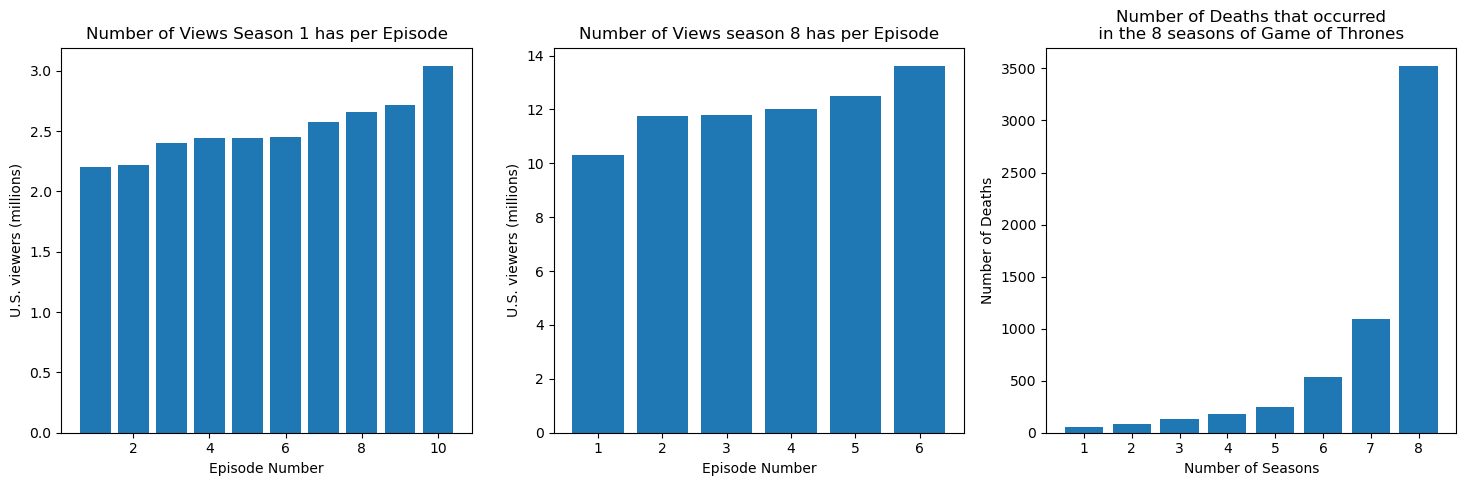

In [22]:
fig6, ax6 = plt.subplots(1,3, figsize = (18,5))
ax6[0].bar(x = [1,2,3,4,5,6,7,8,9,10], height = GOT_Bar1.sort_values(ascending = True).values)
ax6[1].bar(x = [1,2,3,4,5,6], height = GOT_Bar2.sort_values(ascending = True).values)
ax6[2].bar(x = [1,2,3,4,5,6,7,8], height = GOT_Bar.sort_values(ascending = True).values)

ax6[0].set_xlabel('Episode Number')
ax6[0].set_ylabel('U.S. viewers (millions)')
ax6[0].set_title('Number of Views Season 1 has per Episode')

ax6[1].set_xlabel('Episode Number')
ax6[1].set_ylabel('U.S. viewers (millions)')
ax6[1].set_title('Number of Views season 8 has per Episode')

ax6[2].set_xlabel('Number of Seasons')
ax6[2].set_ylabel('Number of Deaths')
ax6[2].set_title('Number of Deaths that occurred\n in the 8 seasons of Game of Thrones ')


plt.show()

Upon conducting a thorough analysis and examination of all the data I have gathered, I can confirm that the quantity of fatalities that occur within a season has no bearing on the total number of views in the "Game of Thrones" series. According to the data, season 1 had the lowest death rate of all the seasons. While season 1's viewership was consistent. This makes sense because, since it was the first season of the show, they didn't want to give away any major plot points right away. It's also reasonable that the first season had the lowest mortality rates since that's when you get to know everyone and their reasons for being on the show. Looking at the last season now, it had both the most views and the greatest fatality rates. As a result, as the show gained popularity, many more significant events happened in which a significant number of individuals were killed off, probably to simulate the show's finale. That being said, there is some leeway for interpretation because the data doesn't clearly indicate the exact times of particular or favorite characters' deaths. More precisely, it merely tracks all the deaths that happen

For additional research into this theory, I would gather information about the most well-liked characters and check to see whether any of them pass away during the series. I would then determine which season and which episode those characters died in, and I would visualize each episode using more graphs as opposed to the entire season. Then, using the previous two graphs above as a guide, I could compare those death character episode graphs to the number of views that particular season and episode received.